In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import binarize
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import warnings
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
dataset = pd.read_csv('//content/diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Accuracy: 0.70995670995671
Recall: 0.6049382716049383
Precision: 0.5833333333333334
F1 Score: 0.5939393939393939


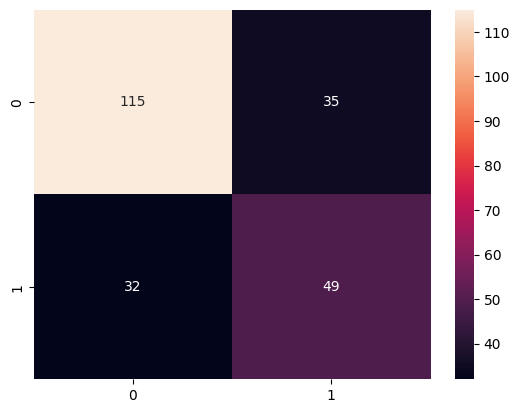

In [6]:
# prompt: code to implement descion tree,print accuracy,recall,precision,f1_score and  plot the confusion matics

from sklearn.tree import DecisionTreeClassifier

X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)
#print(type(model))
#print(model)
#print(X_test.head())
#print(y_test.head())
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()


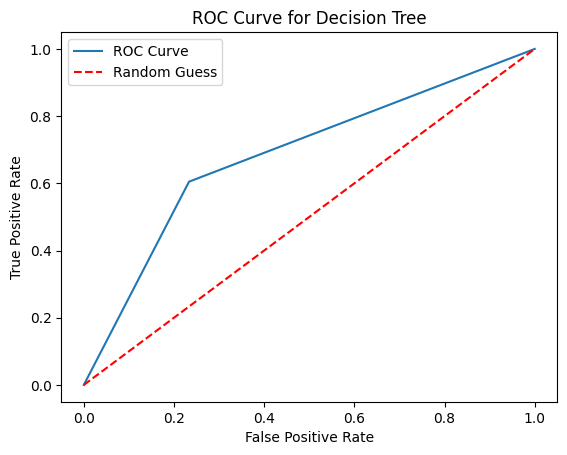

In [7]:
# prompt: plot roc curve for above algorithm

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend()
plt.show()


Accuracy (Naive Bayes): 0.7619047619047619
Recall (Naive Bayes): 0.6419753086419753
Precision (Naive Bayes): 0.6666666666666666
F1 Score (Naive Bayes): 0.6540880503144653


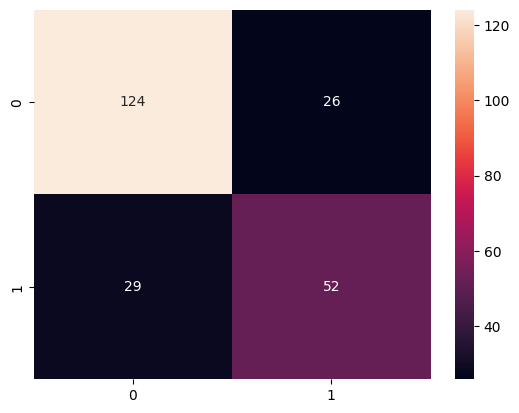

In [ ]:
# prompt: code to implement navie bayes,print accuracy,recall,precision,f1_score and  plot the confusion matics

from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier on the training data
gnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gnb = gnb.predict(X_test)

# Calculate and print the accuracy, recall, precision, and f1-score
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
recall_gnb = recall_score(y_test, y_pred_gnb)
precision_gnb = precision_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb)

print("Accuracy (Naive Bayes):", accuracy_gnb)
print("Recall (Naive Bayes):", recall_gnb)
print("Precision (Naive Bayes):", precision_gnb)
print("F1 Score (Naive Bayes):", f1_gnb)

# Plot the confusion matrix
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
sns.heatmap(cm_gnb, annot=True, fmt="d")
plt.show()


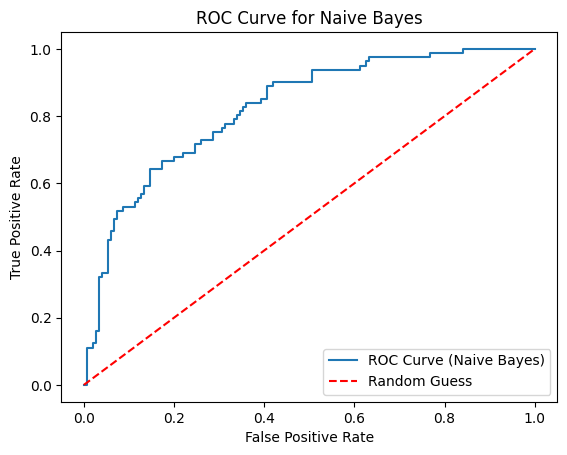

In [ ]:
y_pred_proba_gnb = gnb.predict_proba(X_test)[:, 1]
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, y_pred_proba_gnb)

plt.plot(fpr_gnb, tpr_gnb, label='ROC Curve (Naive Bayes)')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend()
plt.show()

Accuracy (Random Forest): 0.7835497835497836
Recall (Random Forest): 0.6296296296296297
Precision (Random Forest): 0.7183098591549296
F1 Score (Random Forest): 0.6710526315789473


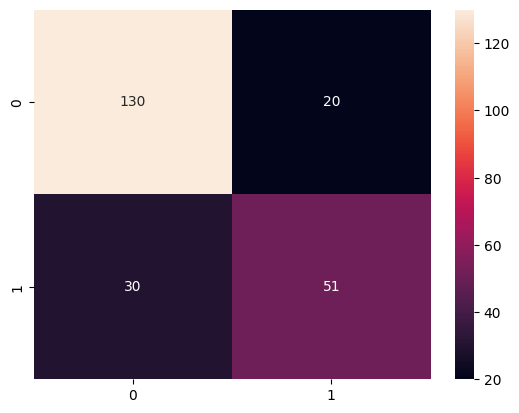

In [ ]:
# prompt: code to implement random forest,print accuracy,recall,precision,f1_score and  plot the confusion matric

from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100)
# Check if the 'rfc' variable is defined
if 'rfc' not in globals():
    raise ValueError("The 'rfc' variable is not defined. Please ensure that you have trained a Random Forest model before plotting the ROC curve.")

# Train the classifier on the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rfc = rfc.predict(X_test)

# Calculate and print the accuracy, recall, precision, and f1-score
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
recall_rfc = recall_score(y_test, y_pred_rfc)
precision_rfc = precision_score(y_test, y_pred_rfc)
f1_rfc = f1_score(y_test, y_pred_rfc)

print("Accuracy (Random Forest):", accuracy_rfc)
print("Recall (Random Forest):", recall_rfc)
print("Precision (Random Forest):", precision_rfc)
print("F1 Score (Random Forest):", f1_rfc)

# Plot the confusion matrix
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cm_rfc, annot=True, fmt="d")
plt.show()


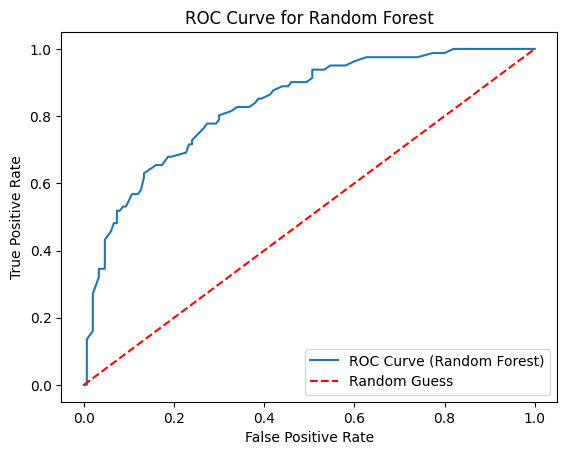

In [ ]:
# prompt: plot the roc curve for above  random forest algorithm

y_pred_proba_rfc = rfc.predict_proba(X_test)[:, 1]
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, y_pred_proba_rfc)

plt.plot(fpr_rfc, tpr_rfc, label='ROC Curve (Random Forest)')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend()
plt.show()


Accuracy (KNN): 0.70995670995671
Recall (KNN): 0.5185185185185185
Precision (KNN): 0.6
F1 Score (KNN): 0.5562913907284768


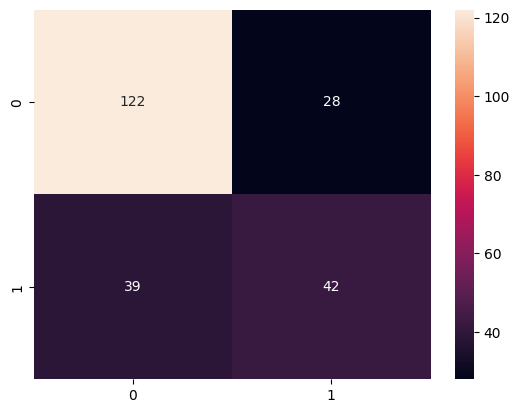

In [ ]:
# prompt: code to implement knn,print accuracy,recall,precision,f1_score and  plot the confusion matics

from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn.predict(X_test)

# Calculate and print the accuracy, recall, precision, and f1-score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print("Accuracy (KNN):", accuracy_knn)
print("Recall (KNN):", recall_knn)
print("Precision (KNN):", precision_knn)
print("F1 Score (KNN):", f1_knn)

# Plot the confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt="d")
plt.show()


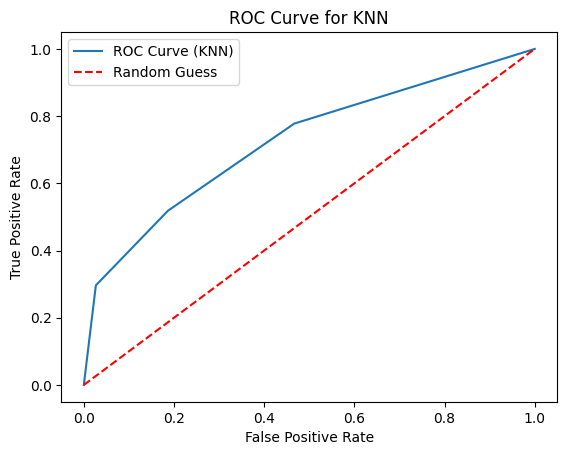

In [ ]:
# prompt: plot the roc curve for above knn algorihm

y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn)

plt.plot(fpr_knn, tpr_knn, label='ROC Curve (KNN)')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend()
plt.show()


Accuracy (SVM): 0.7792207792207793
Recall (SVM): 0.5061728395061729
Precision (SVM): 0.7884615384615384
F1 Score (SVM): 0.6165413533834587


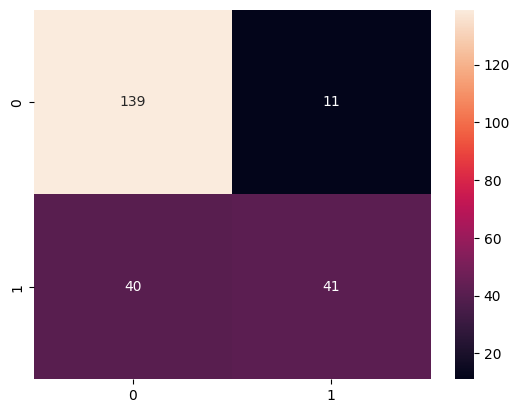

In [ ]:
# prompt: code to implement  svm accuracy,recall,precision,f1_score and  plot the confusion matics

from sklearn import svm

# Create a SVM classifier
svm_classifier = svm.SVC()
svm_classifier = SVC(probability=True)
# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_classifier.predict(X_test)

# Calculate and print the accuracy, recall, precision, and f1-score
accuracy_svm = accuracy_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print("Accuracy (SVM):", accuracy_svm)
print("Recall (SVM):", recall_svm)
print("Precision (SVM):", precision_svm)
print("F1 Score (SVM):", f1_svm)

# Plot the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d")
plt.show()


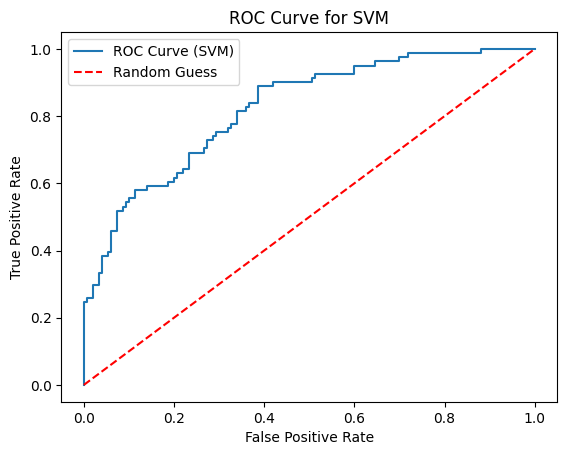

In [ ]:
# prompt: plot the roc curve curve for above svm algorithm

y_pred_proba_svm = svm_classifier.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_proba_svm)

plt.plot(fpr_svm, tpr_svm, label='ROC Curve (SVM)')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend()
plt.show()


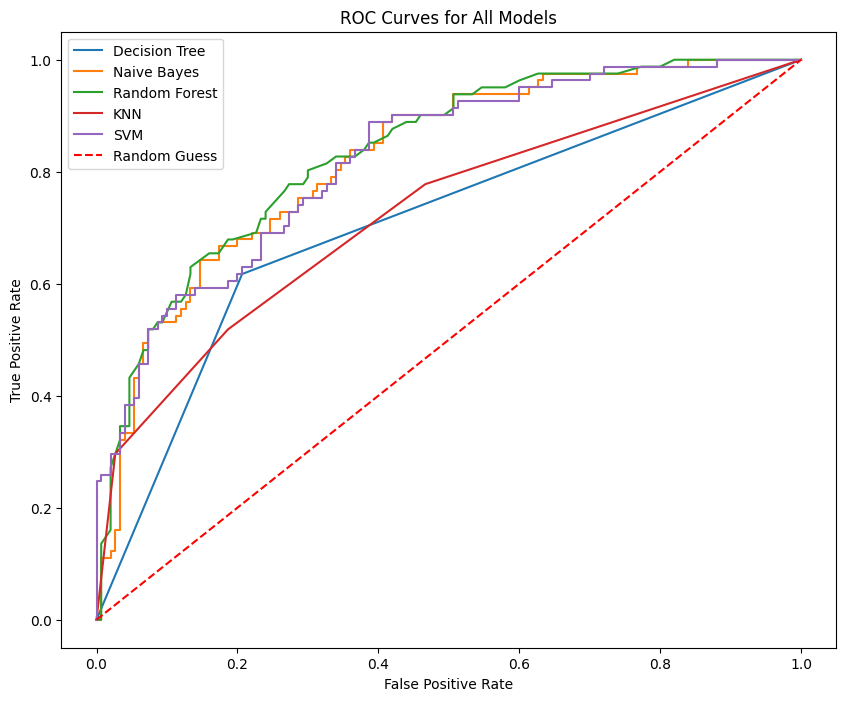

In [ ]:
# prompt: plot one roc curve representing the above all algorithms

# Plot the ROC curves for all models
plt.figure(figsize=(10, 8))

plt.plot(fpr, tpr, label='Decision Tree')
plt.plot(fpr_gnb, tpr_gnb, label='Naive Bayes')
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.plot(fpr_svm, tpr_svm, label='SVM')

plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.show()


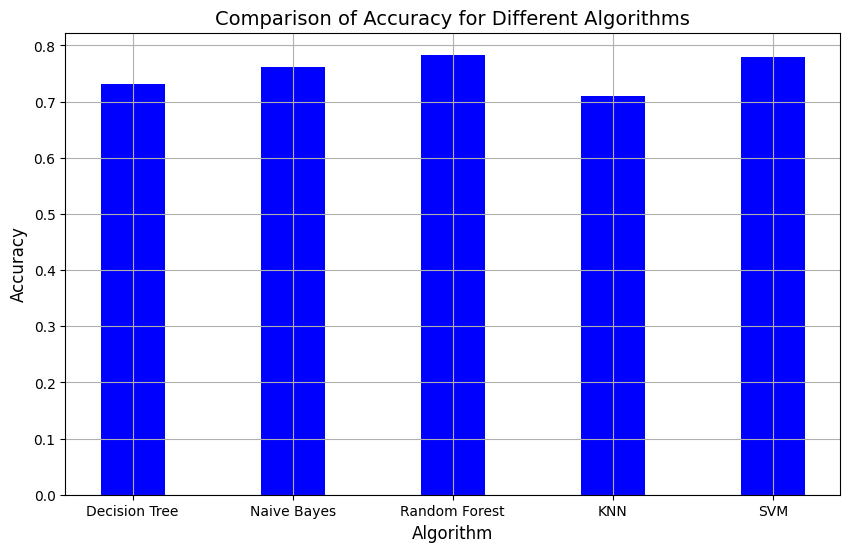

In [ ]:
# prompt: plot the bar graph to compare accuracy for above algorithms

# Create a list of algorithm names
algorithm_names = ['Decision Tree', 'Naive Bayes', 'Random Forest', 'KNN', 'SVM']

# Create a list of corresponding accuracy scores
accuracy_scores = [accuracy, accuracy_gnb, accuracy_rfc, accuracy_knn, accuracy_svm]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithm_names, accuracy_scores, color='blue', width=0.4)

# Add labels and title
plt.xlabel('Algorithm', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Comparison of Accuracy for Different Algorithms', fontsize=14)

# Add grid and show the plot
plt.grid(True)
plt.show()


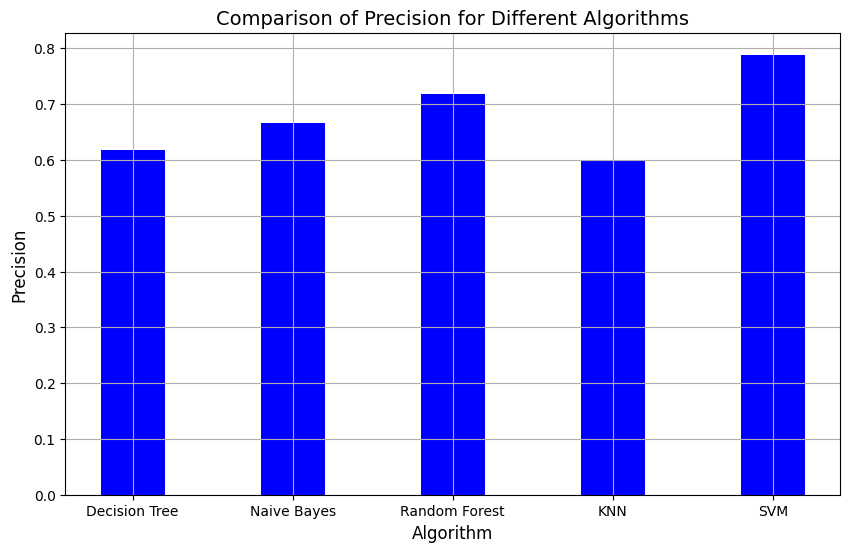

In [ ]:
# prompt: plot the bar graph to compare precision for above algorithms

# Create a list of algorithm names
algorithm_names = ['Decision Tree', 'Naive Bayes', 'Random Forest', 'KNN', 'SVM']

# Create a list of corresponding precision scores
precision_scores = [precision, precision_gnb, precision_rfc, precision_knn, precision_svm]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithm_names, precision_scores, color='blue', width=0.4)

# Add labels and title
plt.xlabel('Algorithm', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Comparison of Precision for Different Algorithms', fontsize=14)

# Add grid and show the plot
plt.grid(True)
plt.show()


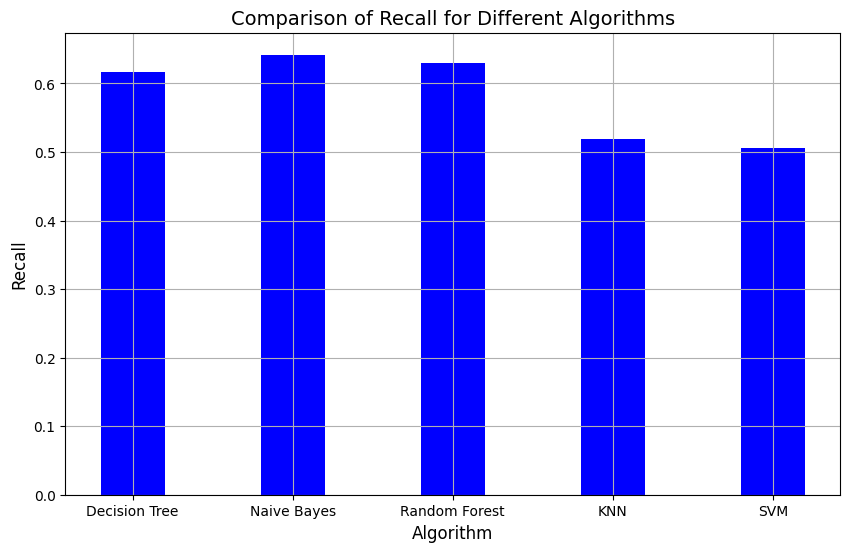

In [ ]:
# prompt: plot the bar graph to compare recall for above algorithms

# Create a list of algorithm names
algorithm_names = ['Decision Tree', 'Naive Bayes', 'Random Forest', 'KNN', 'SVM']

# Create a list of corresponding recall scores
recall_scores = [recall, recall_gnb, recall_rfc, recall_knn, recall_svm]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithm_names, recall_scores, color='blue', width=0.4)

# Add labels and title
plt.xlabel('Algorithm', fontsize=12)
plt.ylabel('Recall', fontsize=12)
plt.title('Comparison of Recall for Different Algorithms', fontsize=14)

# Add grid and show the plot
plt.grid(True)
plt.show()


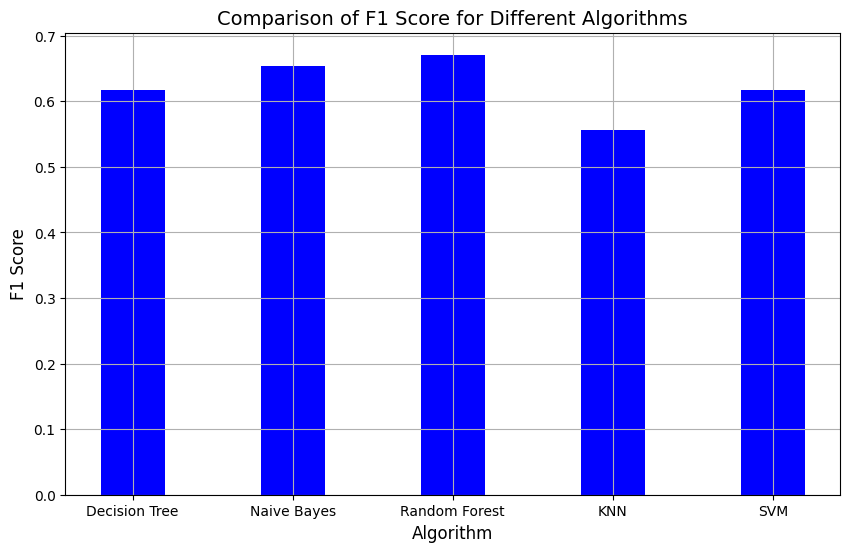

In [ ]:
# prompt: plot the bar graph to compare f1 score for above algorithms

# Create a list of algorithm names
algorithm_names = ['Decision Tree', 'Naive Bayes', 'Random Forest', 'KNN', 'SVM']

# Create a list of corresponding f1 scores
f1_scores = [f1, f1_gnb, f1_rfc, f1_knn, f1_svm]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithm_names, f1_scores, color='blue', width=0.4)

# Add labels and title
plt.xlabel('Algorithm', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.title('Comparison of F1 Score for Different Algorithms', fontsize=14)

# Add grid and show the plot
plt.grid(True)
plt.show()


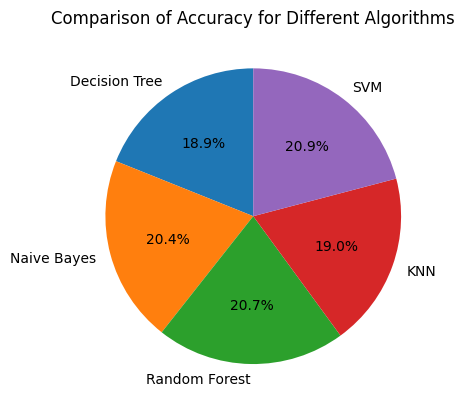

In [ ]:
# prompt: draw pie chart to compare accurarices for all above algorithms

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Create a list of algorithm names
algorithm_names = ['Decision Tree', 'Naive Bayes', 'Random Forest', 'KNN', 'SVM']

# Create a list of corresponding accuracy scores
accuracy_scores = [accuracy, accuracy_gnb, accuracy_rfc, accuracy_knn, accuracy_svm]

# Create a pie chart
plt.pie(accuracy_scores, labels=algorithm_names, autopct='%1.1f%%', startangle=90)

# Add title
plt.title('Comparison of Accuracy for Different Algorithms')

# Show the plot
plt.show()

In [ ]:
# prompt: plot a table with accuracy ,precision.recall,f1 score of all above models

import pandas as pd

data = {'Algorithm': ['Decision Tree', 'Naive Bayes', 'Random Forest', 'KNN', 'SVM'],
       'Accuracy': [accuracy, accuracy_gnb, accuracy_rfc, accuracy_knn, accuracy_svm],
       'Precision': [precision, precision_gnb, precision_rfc, precision_knn, precision_svm],
       'Recall': [recall, recall_gnb, recall_rfc, recall_knn, recall_svm],
       'F1 Score': [f1, f1_gnb, f1_rfc, f1_knn, f1_svm]}

df = pd.DataFrame(data)

print(df.to_string())


       Algorithm  Accuracy  Precision    Recall  F1 Score
0  Decision Tree  0.731602   0.617284  0.617284  0.617284
1    Naive Bayes  0.761905   0.666667  0.641975  0.654088
2  Random Forest  0.783550   0.718310  0.629630  0.671053
3            KNN  0.709957   0.600000  0.518519  0.556291
4            SVM  0.779221   0.788462  0.506173  0.616541
